# EDA for Cord19 Dataset

# Environment Setup / Package Installation

In [8]:
!pip install -U spacy==2.3.2.

     |████████████████████████████████| 9.9MB 3.8MB/s 
     |████████████████████████████████| 2.1MB 46.8MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [22]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 5.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.3MB 311kB/s 
     |████████████████████████████████| 9.9MB 45.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=72be44bd2588d39066fd3cd63140713373ba75617d86dcb301b19789eece2b69
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [36]:
!pip install -U  yellowbrick==1.3.post1

     |████████████████████████████████| 276kB 5.0MB/s 
     |████████████████████████████████| 14.8MB 475kB/s 
ERROR: pyldavis 3.3.1 has requirement numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
      Successfully uninstalled numpy-1.20.2
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [16]:
!pip install umap-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import spacy
import nltk
import gensim


In [8]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Data Loading and Preprocessing

In [3]:
from google.colab import files
uploaded = files.upload()

In [4]:
coord19_df = pd.read_csv('coord19.csv')
abstracts_only = coord19_df[['cord_uid', 'abstract']]
abstracts = abstracts_only['abstract'].str.lower()

# Histogram Plots of Lengths 

In [8]:
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.7/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


## Document Word distribution

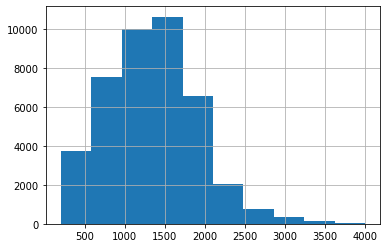

In [6]:
abstracts.str.len().hist()

## Word distribution in Sentence

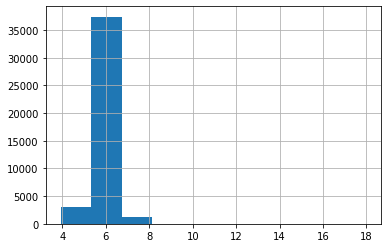

In [7]:
abstracts.str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

# Basic Text Analysis

## Top Words Distribution

In [5]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
new_words=('=','2019', 'also', 'may')
for i in new_words:
    stopwords.append(i)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords(text):
    stop=set(stopwords)
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:70]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

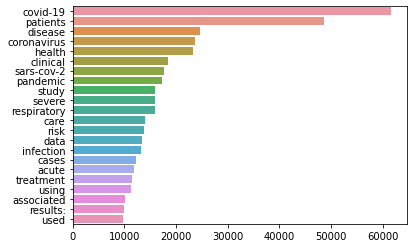

In [13]:
plot_top_non_stopwords(abstracts)

## Top 2-grams Distribution

In [14]:

from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams(text, n=2):
    stop=set(stopwords)

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:25]

    top_n_bigrams=_get_top_ngram(text,n)[:25]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

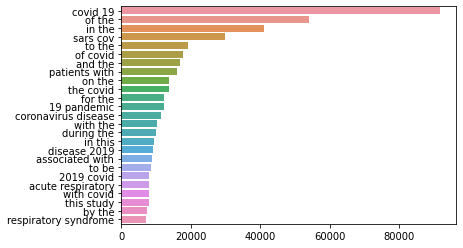

In [15]:
plot_top_ngrams(abstracts,2)

## Top 3-grams Distribution

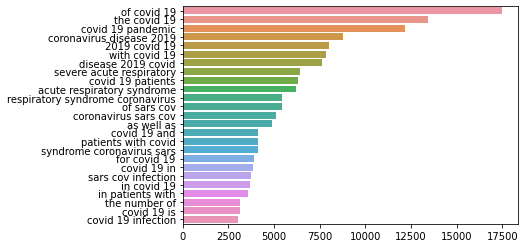

In [16]:
plot_top_ngrams(abstracts,3)

## Word Cloud Visualization

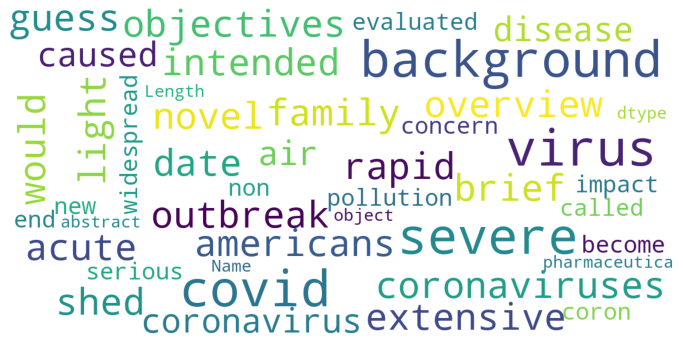

In [19]:
from wordcloud import WordCloud

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(abstracts)

# Topics 

## LDA and Visualization of Topics

In [17]:
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim_models

def get_lda_objects(text):
    stop=set(stopwords)

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    pyLDAvis.save_html(vis,'lda_topics_coord19.html')
    return vis

In [18]:
lda_model, bow_corpus, dic = get_lda_objects(abstracts)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [14]:
plot_lda_vis(lda_model, bow_corpus, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.121531 -0.039658       1        1  22.232883
1      0.080045 -0.040076       2        1  21.234715
2     -0.140278 -0.106623       3        1  20.834192
4      0.204279 -0.054555       4        1  17.888310
3     -0.022515  0.240911       5        1  17.809899, topic_info=             Term          Freq         Total Category  logprob  loglift
77        patient  68463.000000  68463.000000  Default  30.0000  30.0000
28       covid-19  85415.000000  85415.000000  Default  29.0000  29.0000
202    sars-cov-2  25473.000000  25473.000000  Default  28.0000  28.0000
1137         cell   9805.000000   9805.000000  Default  27.0000  27.0000
51         health  24396.000000  24396.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
111          used   2482.416504  10202.978069   Topic5  -5.8723   0.3120
572      analysis   2455.097412  10308.440133   Topic5  -5.8834   0.2906
26    coronavirus   2687.227395  24823.520191   Topic5  -5.7931  -0.4979
33        disease   2477.588933  34157.487405   Topic5  -5.8743  -0.8983
1010    treatment   2363.623113  15370.235589   Topic5  -5.9214  -0.1468

[455 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5870      4  0.998541  0.0001
553       3  0.007397   0.001
553       4  0.992174   0.001
4606      3  0.012603    0.01
4606      4  0.975145    0.01
...     ...       ...     ...
113       1  0.152815    year
113       2  0.098561    year
113       3  0.136499    year
113       4  0.602639    year
113       5  0.009551    year

[1039 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 5, 4])

## Non-negative Matrix Factorization

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD

tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords,max_df=0.90, min_df =25, max_features=5000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(abstracts)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))


,00,000,0001,001,002,003,004,005,006,007,008,009,01,02,03,039,04,05,06,07,08,09,10,100,1000,101,102,103,104,105,106,107,108,109,11,110,112,114,12,120,...,workload,workplace,works,world,worldwide,worry,worse,worsen,worsened,worsening,worst,worth,would,wound,writing,written,wt,wuhan,www,year,years,yet,yield,yielded,york,young,younger,youth,zealand,zero,zhejiang,zika,zinc,zone,zones,zoonotic,µg,µl,µm,î³
0,0.0,0.156651,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.077533,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.043245,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.115257,0.0,0.0,0.0,0.000000,0.0,0.064298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.055659,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.045714,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.064089,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123886,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.072137,0.0,0.0,0.114627,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.200253,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41772,0.0,0.000000,0.408878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.079175,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
41773,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.034614,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.031149,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
41774,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076918,0.0,0.0,0.0,0.0,0.085414,0.0,0.085989,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.

In [27]:
nmf = NMF(n_components=10, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)


/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

In [28]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [30]:
display_topics(nmf, tfidf_feature_names, 15)

Topic 0:
patients group hospital clinical admission icu age treatment days vs years median study higher admitted
Topic 1:
cov sars respiratory coronavirus syndrome infection acute virus severe viral mers coronaviruses rna human caused
Topic 2:
health social mental pandemic public anxiety psychological people research impact crisis covid stress 19 students
Topic 3:
cases epidemic china 2020 number countries model spread transmission wuhan confirmed outbreak measures control data
Topic 4:
cells ace2 cell expression protein immune receptor angiotensin host inflammatory il viral human lung binding
Topic 5:
care pandemic healthcare health medical patient surgical surgery management cancer procedures staff services recommendations telemedicine
Topic 6:
ci 95 risk mortality analysis associated studies 001 age study meta confidence higher factors odds
Topic 7:
ct pcr rt chest positive test negative diagnosis imaging testing detection samples tests diagnostic pneumonia
Topic 8:
drugs drug treat

In [25]:
labels = []
for i in range(len(abstracts)):
    top_topics = (
        lda_model.get_document_topics(bow_corpus[i],
                                      minimum_probability=0.0)
    )
    topic_score = [top_topics[i][1] for i in range(10)]
    index = topic_score.index(max(topic_score))
    labels.append(index)

# Class to Text Visualization

## Mapping Topics to Class for Analysis

In [26]:
labeled_abstracts = pd.DataFrame()
labeled_abstracts['abstract'] = abstracts
labeled_abstracts['class'] = labels
labeled_abstracts.head(15)

,abstract,class
0,"background and objectives: to date, more than ...",8
1,the rapid outbreak of the novel severe acute r...,7
2,coronaviruses are an extensive family of virus...,7
3,this brief overview is intended to shed light ...,7
4,few americans would guess that from 2014 to 20...,3
5,abstract: as the outbreak of novel 2019 corona...,8
6,the newly emergent human virus sars-cov-2 is r...,8
7,the world faces an unprecedented sars-cov2 pan...,8
8,we called by telephone a representative sample...,5
9,following the rapid dissemination of covid-19 ...,8


In [27]:
from sklearn import model_selection, preprocessing

# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(labeled_abstracts['abstract'], labeled_abstracts['class'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [28]:
from sklearn.feature_extraction.text import  TfidfVectorizer

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(labeled_abstracts['abstract'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

## UMAP Visualizations

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

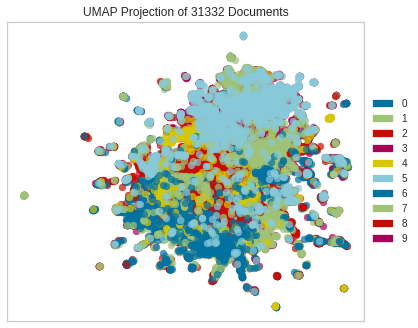

In [29]:

from yellowbrick.text import UMAPVisualizer
umap = UMAPVisualizer()
umap.fit(xtrain_tfidf, train_y)
umap.show()

## T-SNE Visualizations

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

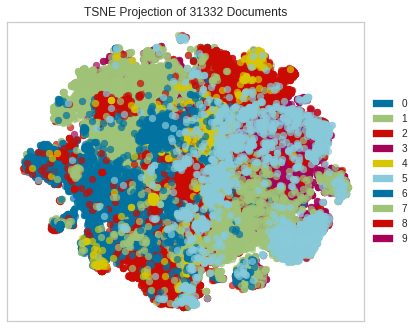

In [30]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer()
tsne.fit_transform(xtrain_tfidf, train_y)
tsne.poof()